In [1]:
import pandas as pd 
import numpy as np
from matplotlib import pyplot as plt

In [2]:
csv = pd.read_csv("Indian Liver Patient Dataset (ILPD).csv",header=None)

In [3]:
csv.columns=["Age",'Gender','Tb_Bilirubin','DB_Bilirubin','Alkaline_Phosphotase','Sgpt ','Sgot','Protiens','Albumin','Albumin_Globulin','Disease']

#Missing Values
csv.info()
csv.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Age                   583 non-null    int64  
 1   Gender                583 non-null    object 
 2   Tb_Bilirubin          583 non-null    float64
 3   DB_Bilirubin          583 non-null    float64
 4   Alkaline_Phosphotase  583 non-null    int64  
 5   Sgpt                  583 non-null    int64  
 6   Sgot                  583 non-null    int64  
 7   Protiens              583 non-null    float64
 8   Albumin               583 non-null    float64
 9   Albumin_Globulin      579 non-null    float64
 10  Disease               583 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


Age                     0
Gender                  0
Tb_Bilirubin            0
DB_Bilirubin            0
Alkaline_Phosphotase    0
Sgpt                    0
Sgot                    0
Protiens                0
Albumin                 0
Albumin_Globulin        4
Disease                 0
dtype: int64

In [4]:
csv['Albumin_Globulin'] = csv['Albumin_Globulin'].fillna(csv['Albumin_Globulin'].mean())
csv.info()
csv.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Age                   583 non-null    int64  
 1   Gender                583 non-null    object 
 2   Tb_Bilirubin          583 non-null    float64
 3   DB_Bilirubin          583 non-null    float64
 4   Alkaline_Phosphotase  583 non-null    int64  
 5   Sgpt                  583 non-null    int64  
 6   Sgot                  583 non-null    int64  
 7   Protiens              583 non-null    float64
 8   Albumin               583 non-null    float64
 9   Albumin_Globulin      583 non-null    float64
 10  Disease               583 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


Age                     0
Gender                  0
Tb_Bilirubin            0
DB_Bilirubin            0
Alkaline_Phosphotase    0
Sgpt                    0
Sgot                    0
Protiens                0
Albumin                 0
Albumin_Globulin        0
Disease                 0
dtype: int64

In [5]:
#replace Gender female with 1 and Male with 0
for i in csv['Gender']:
    if i=='Female':
        csv = csv.replace('Female',1)
    else:
        csv =csv.replace('Male',0)
        

In [6]:
csv


,Age,Gender,Tb_Bilirubin,DB_Bilirubin,Alkaline_Phosphotase,Sgpt,Sgot,Protiens,Albumin,Albumin_Globulin,Disease
0,65,1,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,0,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,0,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,0,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,0,3.9,2.0,195,27,59,7.3,2.4,0.40,1
...,...,...,...,...,...,...,...,...,...,...,...
578,60,0,0.5,0.1,500,20,34,5.9,1.6,0.37,2
579,40,0,0.6,0.1,98,35,31,6.0,3.2,1.10,1
580,52,0,0.8,0.2,245,48,49,6.4,3.2,1.00,1
581,31,0,1.3,0.5,184,29,32,6.8,3.4,1.00,1


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f6f11e8b0a0>,
      dtype=object)

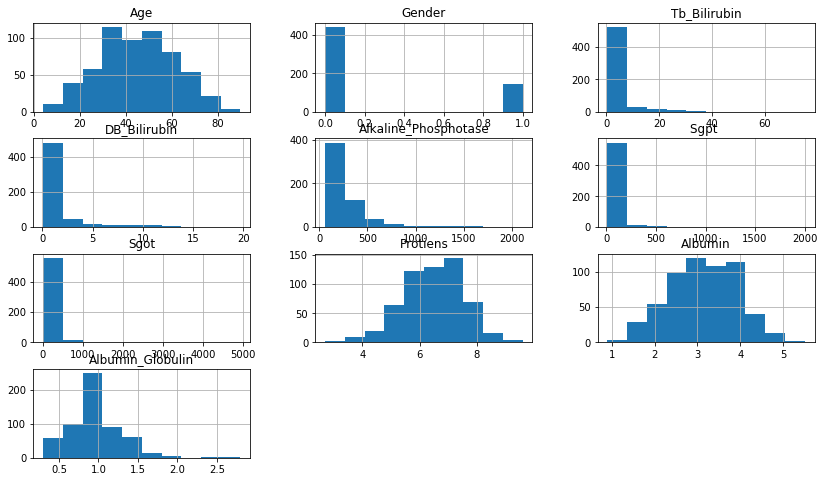

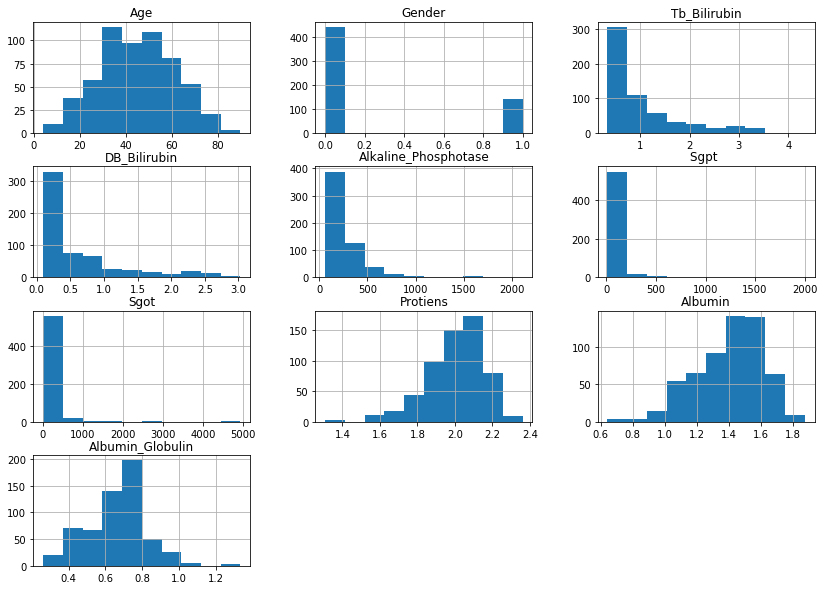

In [7]:
#Create Input && output data 
X_data = csv.drop('Disease',axis=1)
Y_data = csv['Disease']

# Visualize skewed continuous features of original data

X_data.hist(figsize=(14,8))


# Skewed features are Albumin, Direct Bilirubin, A/G ratio, Tota Bilirubin, Total Protein 
#Log-transform the skewed features
skewed = ['Albumin', 'DB_Bilirubin', 'Tb_Bilirubin', 'Albumin_Globulin', 'Protiens']
X_data[skewed] = X_data[skewed].apply(lambda x: np.log(x + 1))
X_data[skewed] = X_data[skewed]
# Visualize the new log distributions
X_data.hist(figsize=(14,10))

In [8]:
# : One-hot encode the data using pandas.get_dummies()
features = pd.get_dummies(X_data)

encoded = list(features.columns)
print ("{} total features after one-hot encoding.".format(len(encoded)))
print (encoded)

disease=pd.get_dummies(Y_data)
encoded = list(disease.columns)
print ("{} disease columns after one-hot encoding.".format(len(encoded)))
print (disease[1])


10 total features after one-hot encoding.
['Age', 'Gender', 'Tb_Bilirubin', 'DB_Bilirubin', 'Alkaline_Phosphotase', 'Sgpt ', 'Sgot', 'Protiens', 'Albumin', 'Albumin_Globulin']
2 disease columns after one-hot encoding.
0      1
1      1
2      1
3      1
4      1
      ..
578    0
579    1
580    1
581    1
582    0
Name: 1, Length: 583, dtype: uint8


In [9]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from tensorflow import keras


def preprocessing(X_data,type="MinMax"):

            #NORMALIZATION#
    if type == "Normalization":
        X_data_normalized = tf.keras.utils.normalize(X_data)
        return X_data_normalized

            #NORM-WITH MINMAX#
    elif type == "MinMax":
        scaler = MinMaxScaler(feature_range=(-1, 1))
        X_data_minmax  = scaler.fit_transform(X_data)
        return X_data_minmax 

X_data_minmax=preprocessing(X_data,type="MinMax")
print(X_data_minmax.shape)


2022-11-19 02:24:22.529661: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-11-19 02:24:22.529688: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


(583, 10)


In [24]:
#Function to perform 5 Folds Cross-Validation
from sklearn.model_selection import cross_validate
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_predict
kf = KFold(n_splits=5)


def cross_validation(model, _X, _y, _cv=kf):
     #_X array input values
     #_Y out labels
     #cv Determines the number of folds for cross-validation.
     
      _scoring = ['accuracy', 'precision', 'recall', 'f1']
      results = cross_validate(estimator=model,
                               X=_X,
                               y=_y,
                               cv=kf,
                               scoring=_scoring,
                               return_train_score=True,verbose=2)

      y_pred = cross_val_predict(gnb, X_data_minmax, Y_data, cv=5)
      geometrin_mean_score=geometric_mean_score(Y_data, y_pred)

      return {"Training Accuracy scores": results['train_accuracy'],
              "Mean Training Accuracy": results['train_accuracy'].mean()*100,
              "Training Precision scores": results['train_precision'],
              "Mean Training Precision": results['train_precision'].mean(),
              "Training Recall scores": results['train_recall'],
              "Mean Training Recall": results['train_recall'].mean(),
              "Training F1 scores": results['train_f1'],
              "Mean Training F1 Score": results['train_f1'].mean(),
              "Validation Accuracy scores": results['test_accuracy'],
              "Mean Validation Accuracy": results['test_accuracy'].mean()*100,
              "Validation Precision scores": results['test_precision'],
              "Mean Validation Precision": results['test_precision'].mean(),
              "Validation Recall scores": results['test_recall'],
              "Mean Validation Recall": results['test_recall'].mean(),
              "Validation F1 scores": results['test_f1'],
              "Mean Validation F1 Score": results['test_f1'].mean(),
              "geometric_mean_score":geometrin_mean_score
      }


In [25]:
#'Function to plot a grouped bar chart showing the training and validation results of the ML model in each fold after applying K-fold cross-validation.
def plot_result(x_label, y_label, plot_title, train_data, val_data,geometric_data):
   #x_label name algorithm
   #y_label: str, Name of metric being visualized e.g 'Accuracy'

        
        # Set size of plot
        plt.figure(figsize=(12,6))
        labels = ["1st Fold", "2nd Fold", "3rd Fold", "4th Fold", "5th Fold"]
        X_axis = np.arange(len(labels))
        ax = plt.gca()
        plt.ylim(0.40000, 1)
        plt.bar(X_axis+0.0, train_data, 0.2, color='blue', label='Training')
        plt.bar(X_axis+0.2, val_data, 0.2, color='red', label='Validation')
        plt.bar(X_axis+0.4, geometric_data, 0.2, color='black', label='Geometric')
        plt.title(plot_title, fontsize=30)
        plt.xticks(X_axis, labels)
        plt.xlabel(x_label, fontsize=14)
        plt.ylabel(y_label, fontsize=14)
        plt.legend()
        plt.grid(True)
        plt.show()

In [26]:
from sklearn.model_selection import KFold
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_validate
from imblearn.metrics import geometric_mean_score

gnb = GaussianNB()
    
#MODEL for Naive Bayes

gnb = GaussianNB()
kf = KFold(n_splits=5)
decision__result = cross_validation(gnb, X_data_minmax, Y_data, kf)
decision__result
#MEAN 
x =  cross_validation(gnb, X_data_minmax, Y_data, kf)
Training_acc=x["Mean Training Accuracy"]
Validation_Acc=x["Mean Validation Accuracy"]
print(Training_acc,Validation_Acc)


[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
59.306871547913346 60.389036251105225


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished


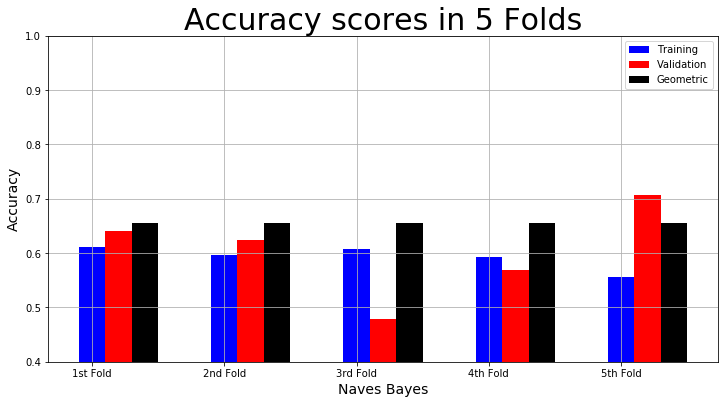

[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
TRAINING ACCURACY :59.306871547913346 VALIDATION ACCURACY :60.389036251105225


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished


In [27]:
model_name = "Naves Bayes"

plot_result(model_name,"Accuracy","Accuracy scores in 5 Folds",decision__result["Training Accuracy scores"],decision__result["Validation Accuracy scores"],decision__result['geometric_mean_score'])

x = cross_validation(gnb, X_data_minmax, Y_data, kf)
Training_acc=x["Mean Training Accuracy"]
Validation_Acc=x["Mean Validation Accuracy"]
print(f'TRAINING ACCURACY :{Training_acc}',f'VALIDATION ACCURACY :{Validation_Acc}')

In [28]:
from sklearn.model_selection import cross_val_predict
y_pred = cross_val_predict(gnb, X_data_minmax, Y_data, cv=5)
y_pred

array([2, 1, 1, 2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 2, 1, 1, 1, 1,
       1, 1, 2, 1, 1, 1, 2, 2, 1, 2, 2, 1, 1, 2, 2, 1, 2, 1, 2, 2, 1, 1,
       2, 1, 1, 1, 2, 1, 2, 2, 1, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 1, 2, 1, 1, 2, 2, 1, 2, 2, 2, 2,
       2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2,
       2, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 1, 1, 1, 1, 1, 2,
       2, 2, 2, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2,
       1, 1, 2, 2, 2, 2, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 2, 1, 1, 2, 2, 2,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 1, 1, 1, 2, 1, 1, 2, 2, 2, 1, 1, 2,
       2, 1, 2, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 1, 1, 2, 2, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 2, 1, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 2, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,

In [29]:
import imblearn
from imblearn.metrics import geometric_mean_score
geometric_mean_scores=geometric_mean_score(Y_data, y_pred)
geometric_mean_scores

0.655777217228971

In [30]:
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC

clf = make_pipeline(StandardScaler(), SVC(gamma='auto'))    


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.1s finished


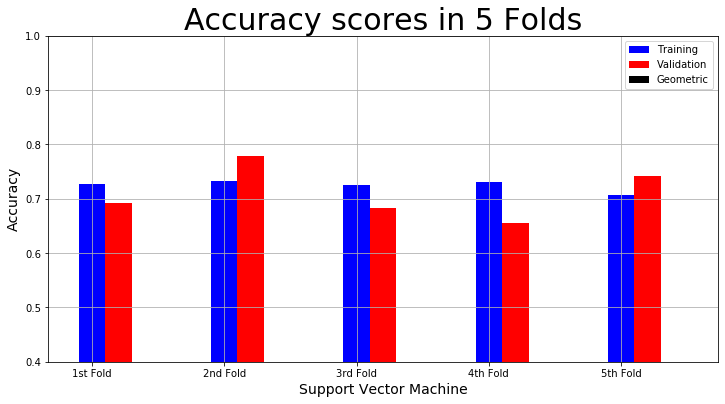

[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
TRAINING ACCURACY :72.42760382681898 VALIDATION ACCURACY :71.0079575596817


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.1s finished


In [31]:

    
#MODEL for SVM
kf = KFold(n_splits=5)
decision__result = cross_validation(clf, X_data_minmax, Y_data, kf)
decision__result
#MEAN 
x =  cross_validation(clf, X_data_minmax, Y_data, kf)
Training_acc=x["Mean Training Accuracy"]
Validation_Acc=x["Mean Validation Accuracy"]
#print(Training_acc,Validation_Acc)

y_pred = cross_val_predict(clf, X_data_minmax, Y_data, cv=5)
geometrin_mean_score=geometric_mean_score(Y_data, y_pred)

model_name = "Support Vector Machine"

plot_result(model_name,"Accuracy","Accuracy scores in 5 Folds",decision__result["Training Accuracy scores"],decision__result["Validation Accuracy scores"],geometrin_mean_score)

x = cross_validation(clf, X_data_minmax, Y_data, kf)
Training_acc=x["Mean Training Accuracy"]
Validation_Acc=x["Mean Validation Accuracy"]
print(f'TRAINING ACCURACY :{Training_acc}',f'VALIDATION ACCURACY :{Validation_Acc}')

In [18]:
geometrin_mean_score

0.13338418345565123

In [80]:
from sklearn.model_selection import GridSearchCV
from sklearn import svm
param_grid = {'C': [1,50,100,150,200], 'gamma': [3],'kernel': ['rbf','linear']}

#input normalization data 
'''X_data_minmax'''
#target output
'''Y_data'''
svc = svm.SVC()
#svc.cv_results_.keys()


In [81]:
for kernel in kernels:
  #svc = svm.SVC(kernel=kernel).fit(X, y)
  #plotSVC(‘kernel=’ + str(kernel))
  grid = GridSearchCV(SVC(kernel=svc),param_grid,refit=True,cv=5,verbose=1)
  grid.fit(X_data_minmax,Y_data)
print(grid.best_score_,grid.best_params_)
#print(grid.cv_results_)
#print(grid.cv_results_.keys())
#print("Training Accuracy scores:",grid.cv_results_['mean_train_score'].mean()*100)
print("Testing Accuracy scores:",grid.cv_results_['mean_test_score'].mean()*100)




Fitting 5 folds for each of 10 candidates, totalling 50 fits
Fitting 5 folds for each of 10 candidates, totalling 50 fits
0.7170203359858532 {'C': 1, 'gamma': 3, 'kernel': 'rbf'}
Testing Accuracy scores: 68.81741821396994


In [82]:
print(grid.best_score_,grid.best_params_)
#print(grid.best_estimator_)
#SV(C=1 gamma=3)

0.7170203359858532 {'C': 1, 'gamma': 3, 'kernel': 'rbf'}


In [83]:
from sklearn.metrics import classification_report, confusion_matrix  
grid_predictions = grid.predict(X_data_minmax)
print(confusion_matrix(Y_data,grid_predictions))
print(classification_report(Y_data,grid_predictions))#Output

[[404  12]
 [121  46]]
              precision    recall  f1-score   support

           1       0.77      0.97      0.86       416
           2       0.79      0.28      0.41       167

    accuracy                           0.77       583
   macro avg       0.78      0.62      0.63       583
weighted avg       0.78      0.77      0.73       583

